In [1]:
import numpy as np
import matplotlib.pyplot as plt

from micrograd import Value, draw_root

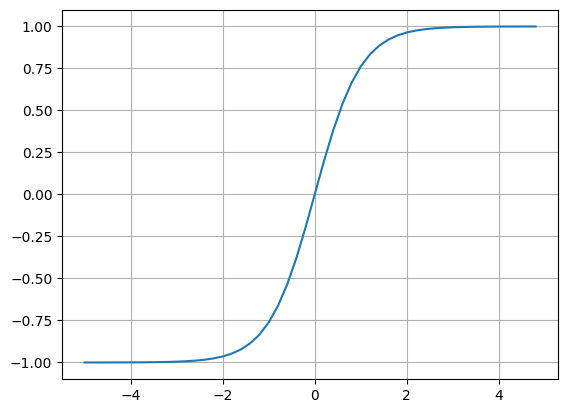

In [2]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

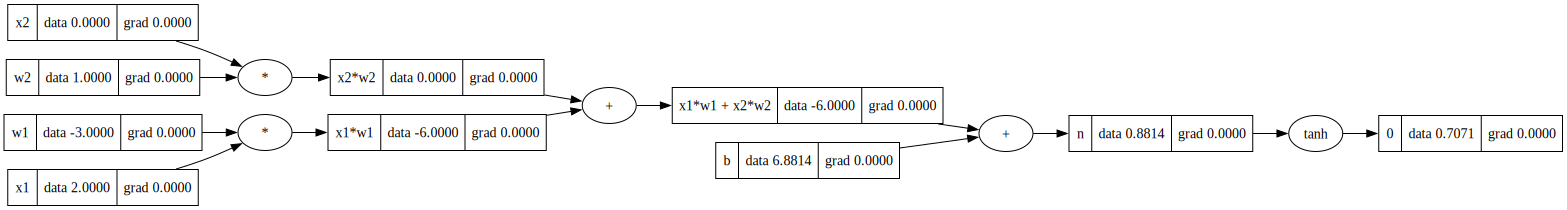

In [3]:
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# 6
# 8
# 6.8813735870195432
b = Value(6.8813735870195432, label="b")

x1w1 = x1 * w1
x1w1.label = "x1*w1"
x2w2 = x2 * w2
x2w2.label = "x2*w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1*w1 + x2*w2"

n = x1w1x2w2 + b
n.label = "n"
o = n.tanh()
o.label = "0"

draw_root(o)